In [1]:
#Importing Functions, Libraries and Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing
# Exploring
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import env
import os
import wrangle


### Exercises
### Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2. Answer those questions through a mix of statistical tests and visualizations.

## Acquire!

In [2]:
#acquire data
df = wrangle.get_zillow_data()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,typeconstructiondesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,propertylandusedesc,storydesc,heatingorsystemdesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,Central
4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"60,371,236,012,000.00",0.01,2017-01-01,NaN,Central,NaN,NaN,Condominium,NaN,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2864704,10833991,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"60,371,319,001,006.00",-0.00,2017-09-20,NaN,Central,NaN,NaN,Condominium,NaN,Central
77376,673515,11000655,NaN,NaN,NaN,2.00,2.00,NaN,6.00,2.00,...,"60,371,014,003,002.00",0.02,2017-09-20,NaN,NaN,NaN,NaN,Single Family Residential,NaN,Central
77377,2968375,17239384,NaN,NaN,NaN,2.00,4.00,NaN,NaN,2.00,...,"61,110,084,022,016.00",0.01,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77378,1843709,12773139,1.00,NaN,NaN,1.00,3.00,NaN,4.00,1.00,...,"60,374,338,022,005.00",0.04,2017-09-21,NaN,Central,NaN,NaN,Single Family Residential,NaN,Central


In [3]:
#checking nulls
df.isnull().sum()

id                                  0
parcelid                            0
airconditioningtypeid           52427
architecturalstyletypeid        77174
basementsqft                    77330
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             77365
buildingqualitytypeid           27709
calculatedbathnbr                 609
decktypeid                      76766
finishedfloor1squarefeet        71357
calculatedfinishedsquarefeet      196
finishedsquarefeet12             3632
finishedsquarefeet13            77339
finishedsquarefeet15            74371
finishedsquarefeet50            71357
finishedsquarefeet6             76994
fips                                0
fireplacecnt                    69104
fullbathcnt                       609
garagecarcnt                    51906
garagetotalsqft                 51906
hashottuborspa                  75842
heatingorsystemtypeid           27941
latitude                            0
longitude   

In [4]:
#checking missing values
df1 = df.copy()
df1 = wrangle.handle_missing_values(df1, .6, .1)

Before dropping nulls, 77380 rows, 68 cols
After dropping nulls. 77380 rows. 34 cols


In [5]:
df1.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           27709
calculatedbathnbr                 609
calculatedfinishedsquarefeet      196
finishedsquarefeet12             3632
fips                                0
fullbathcnt                       609
heatingorsystemtypeid           27941
latitude                            0
longitude                           0
lotsizesquarefeet                8239
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              27050
rawcensustractandblock              0
regionidcity                     1471
regionidcounty                      0
regionidzip                        50
roomcnt                             0
unitcnt                         26818
yearbuilt                         263
structuretaxvaluedollarcnt        112
taxvaluedollarcnt                   1
assessmentye

In [6]:
def prepare_zillow(df):
    df = df.drop(columns=['id','buildingqualitytypeid','heatingorsystemtypeid','propertyzoningdesc','unitcnt','heatingorsystemdesc'])
    df.calculatedbathnbr = df.calculatedbathnbr.fillna(0)
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.fillna(0)
    df.finishedsquarefeet12 = df.finishedsquarefeet12.fillna(0)
    df.fullbathcnt = df.fullbathcnt.fillna(0)
    df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(0)
    df.regionidcity = df.regionidcity.fillna(0)
    df.regionidzip = df.regionidzip.fillna(0)
    df.yearbuilt = df.yearbuilt.fillna(0)
    df.structuretaxvaluedollarcnt = df.structuretaxvaluedollarcnt.fillna(0)
    df.taxvaluedollarcnt = df.taxvaluedollarcnt.fillna(0)
    df.landtaxvaluedollarcnt = df.landtaxvaluedollarcnt.fillna(0)
    df.taxamount = df.taxamount.fillna(0)
    df.censustractandblock = df.censustractandblock.fillna(0)
    
    return df


In [7]:
df1 = prepare_zillow(df1)

In [8]:
df1.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 0 to 77379
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77380 non-null  int64  
 1   bathroomcnt                   77380 non-null  float64
 2   bedroomcnt                    77380 non-null  float64
 3   calculatedbathnbr             77380 non-null  float64
 4   calculatedfinishedsquarefeet  77380 non-null  float64
 5   finishedsquarefeet12          77380 non-null  float64
 6   fips                          77380 non-null  float64
 7   fullbathcnt                   77380 non-null  float64
 8   latitude                      77380 non-null  float64
 9   longitude                     77380 non-null  float64
 10  lotsizesquarefeet             77380 non-null  float64
 11  propertycountylandusecode     77380 non-null  object 
 12  propertylandusetypeid         77380 non-null  float64
 13  r

In [10]:
#checking outliers by columns
numerical_columns = [col for col in df1.columns if col in df1.select_dtypes(include = ["number"])]

In [11]:
numerical_columns

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror']

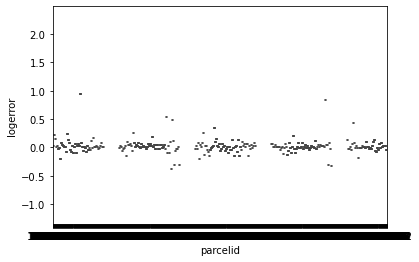

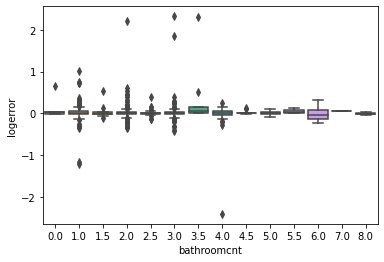

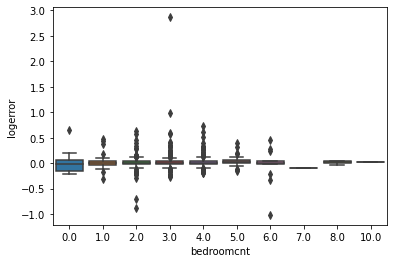

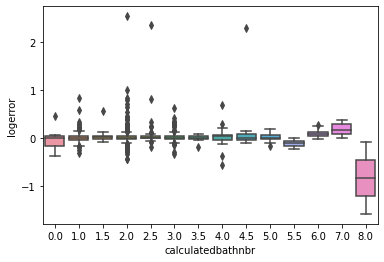

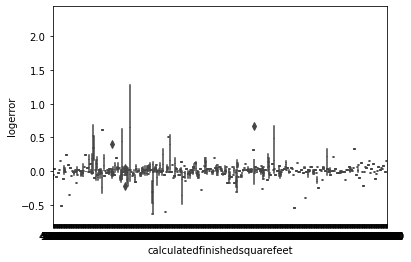

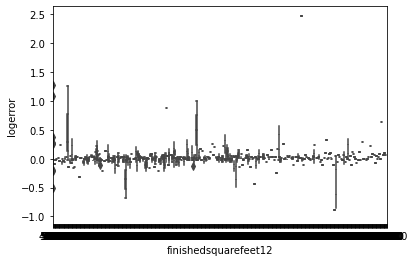

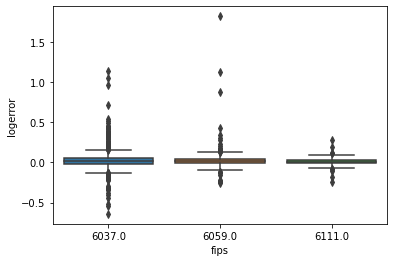

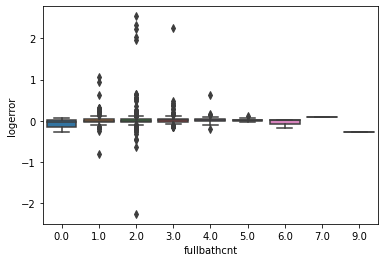

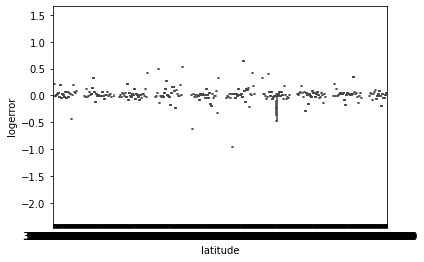

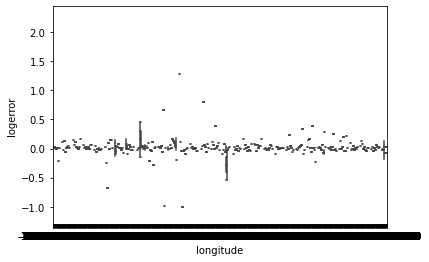

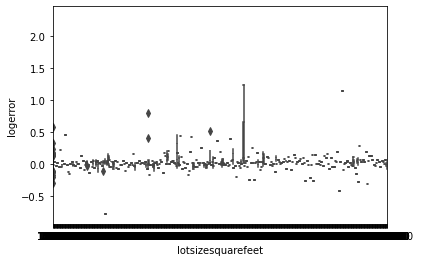

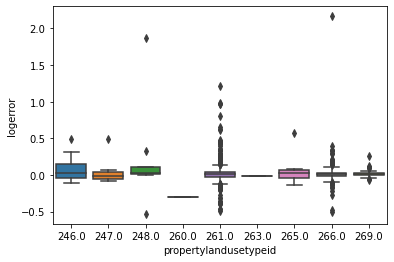

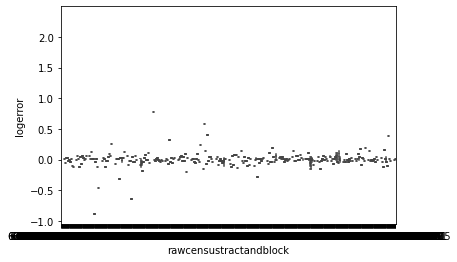

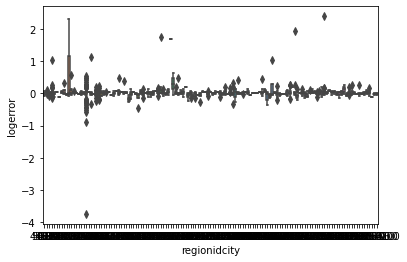

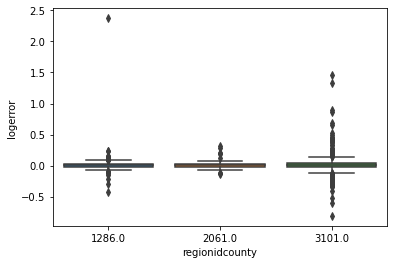

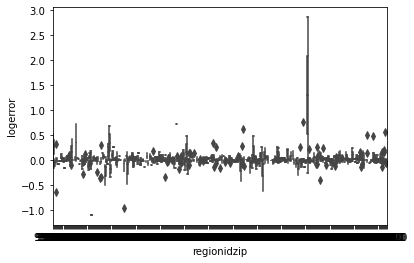

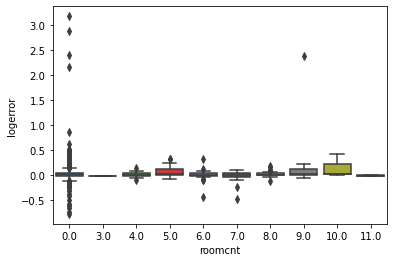

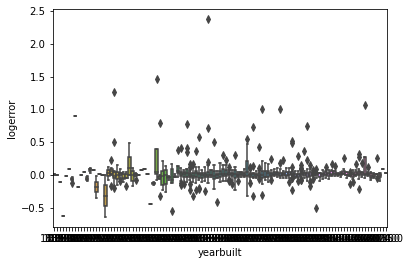

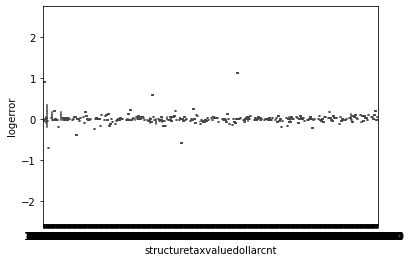

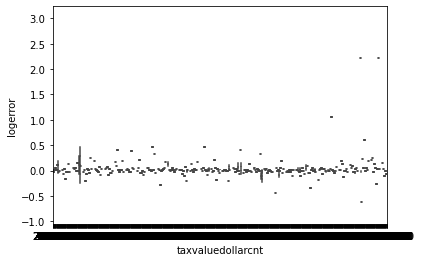

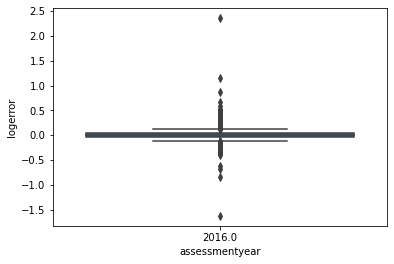

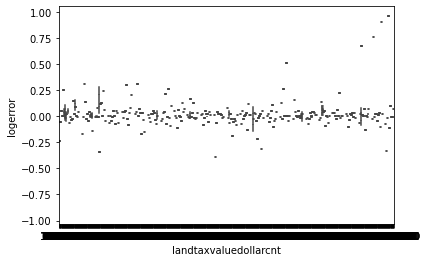

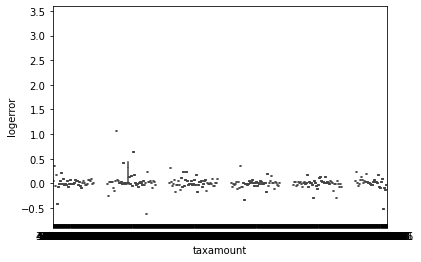

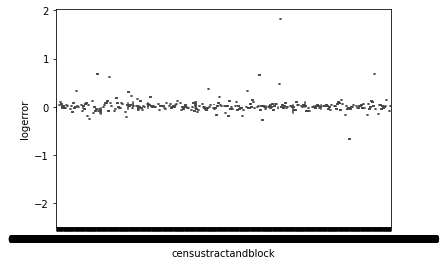

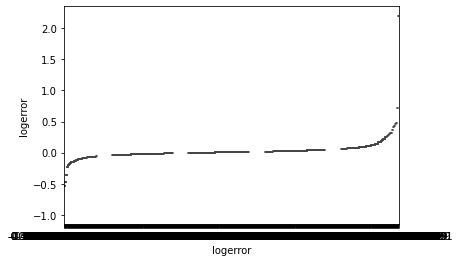

In [17]:
for col in numerical_columns:
    sns.boxplot(x=df1[col].sample(1000),y=df1.logerror)
    plt.show()

In [13]:
temp = [
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'lotsizesquarefeet',
 'regionidcounty',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

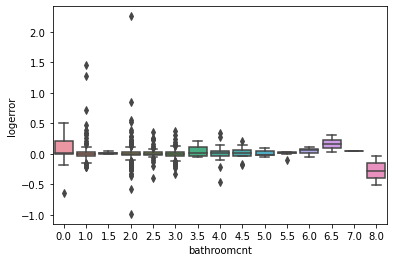

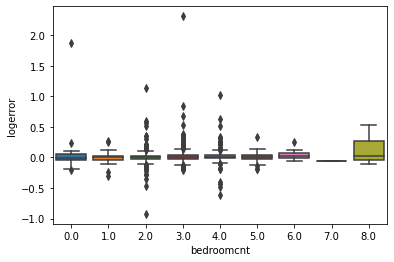

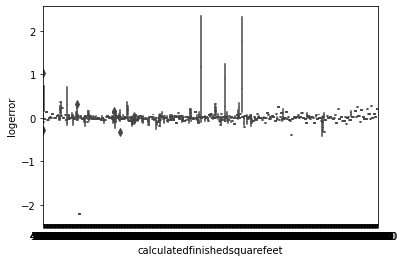

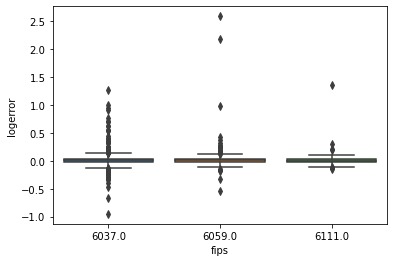

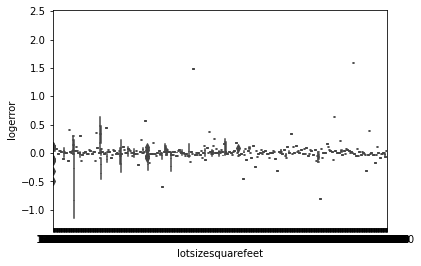

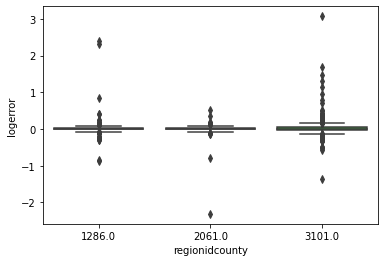

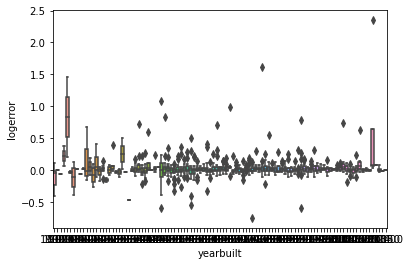

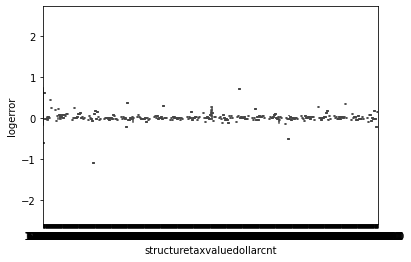

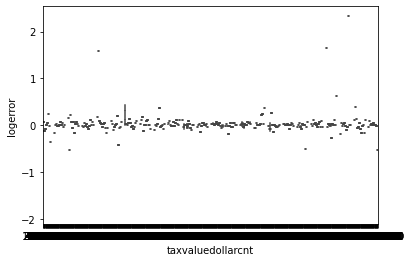

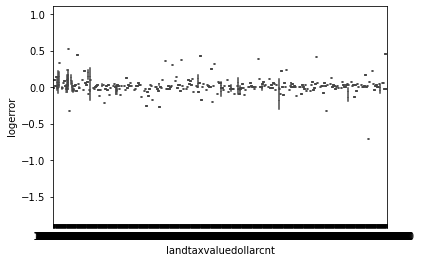

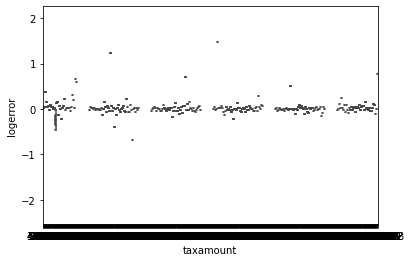

In [15]:
for col in temp:
    sns.boxplot(x=df1[col].sample(1000),y=df1.logerror)
    plt.show()

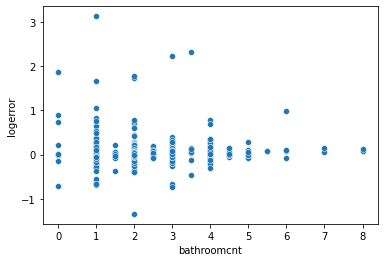

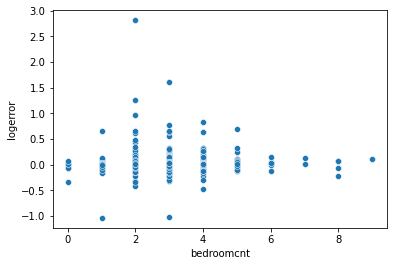

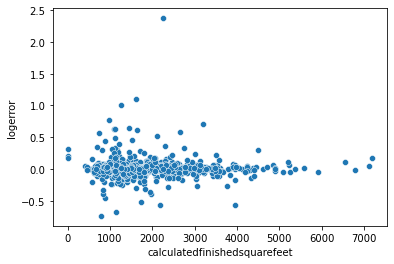

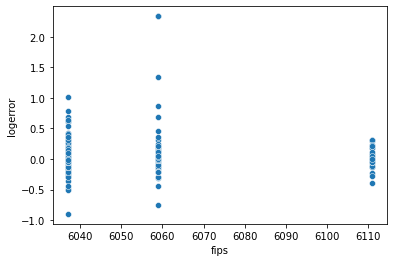

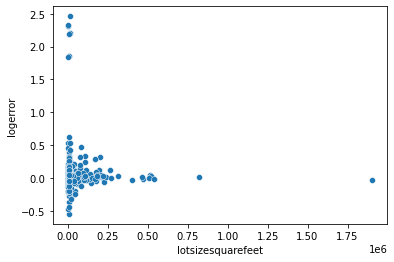

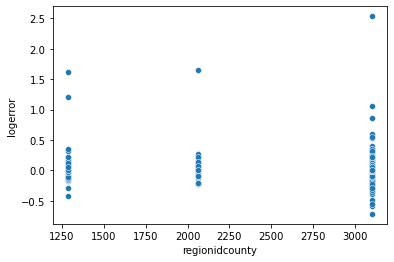

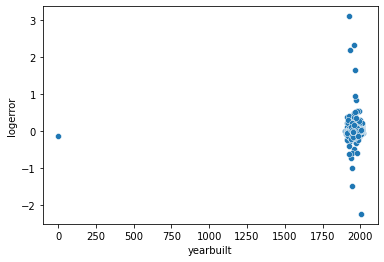

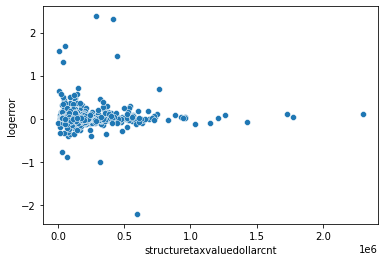

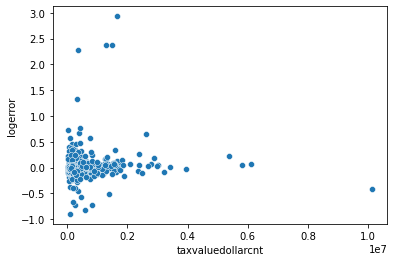

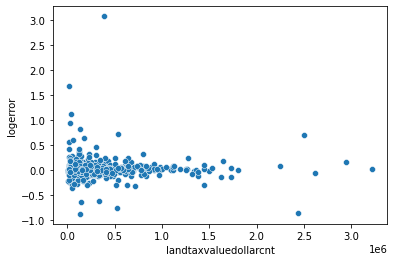

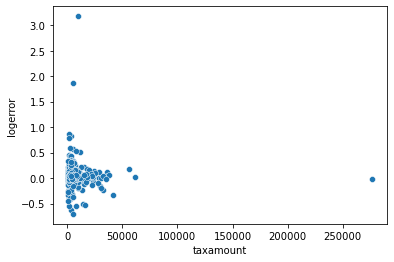

In [16]:
for col in temp:
    sns.scatterplot(x=df1[col].sample(1000),y=df1.logerror)
    plt.show()

<AxesSubplot:xlabel='bedroomcnt'>

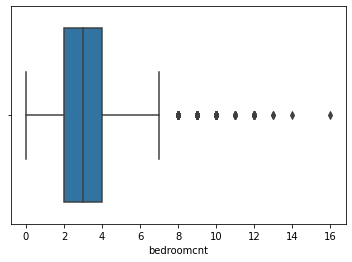

In [30]:
#checking outliers
sns.boxplot(x = 'bedroomcnt',data = df1)

In [ ]:
#check & remove outliers function
def remove_outliers(df1, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df1[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df1[(df1[col] > lower_bound) & (df1[col] < upper_bound)]
        
    return df1

## Prepare!

In [18]:
# this function is splitting data to train, validate, and test to avoid data leakage
def split_data(df1):
    '''
    This function performs split on zillow data, stratify assesed value.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123) 
                                            
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123) 
                                    
    return train, validate, test


In [19]:
train, validate, test = split_data(df)

In [20]:
train.shape

(43332, 68)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43332 entries, 14505 to 54422
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            43332 non-null  int64  
 1   parcelid                      43332 non-null  int64  
 2   airconditioningtypeid         13989 non-null  float64
 3   architecturalstyletypeid      112 non-null    float64
 4   basementsqft                  26 non-null     float64
 5   bathroomcnt                   43332 non-null  float64
 6   bedroomcnt                    43332 non-null  float64
 7   buildingclasstypeid           6 non-null      float64
 8   buildingqualitytypeid         27958 non-null  float64
 9   calculatedbathnbr             42982 non-null  float64
 10  decktypeid                    332 non-null    float64
 11  finishedfloor1squarefeet      3332 non-null   float64
 12  calculatedfinishedsquarefeet  43216 non-null  float64
 1

In [22]:
train.fips.value_counts()

6,037.00    28475
6,059.00    11406
6,111.00     3451
Name: fips, dtype: int64

## Explore!
 - Ask your question

 - Vizualize it

 - Perform a stats test, if needed

 - Write your takeaway


## Q1 Is logerror significantly different for properties in LA County vs. Orange County vs. Ventura County?

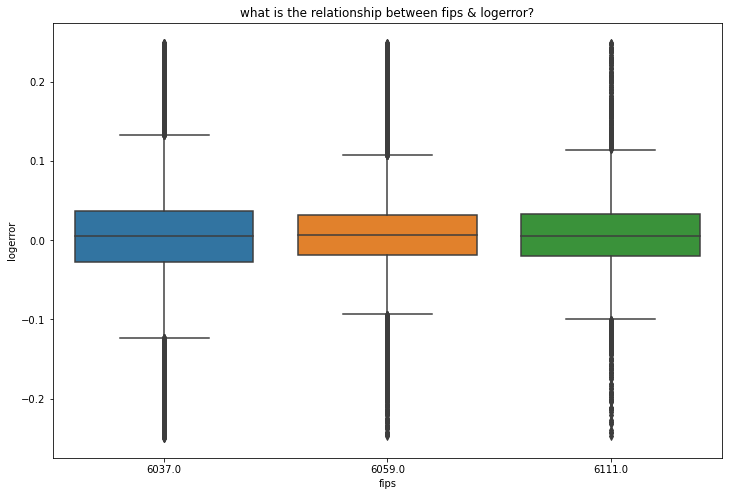

In [23]:
plt.figure(figsize=(12,8))
mask = (train.logerror < 0.25) & (train.logerror > -0.25)
sns.boxplot(data = train[mask], x = 'fips', y = 'logerror');
plt.title('what is the relationship between fips & logerror?')
plt.show()

In [24]:
#la_county = train.fips == 6037.0
#orange_county = train.fips == 6059.0
#ventura_county = train.fips == 6111.0


## Takeaway
 - Here we can see  that there doesn't seem to be any significance difference.
 - Orange & Ventura counties seems to have the same log error.
 - LA county seems to have the highest log error compared to the rest

## Q2 What is the relationship between bedrooms, bathrooms & logerror?

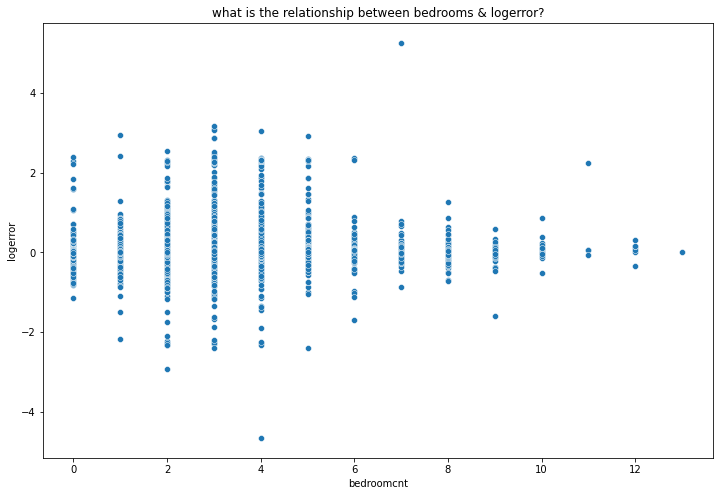

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'bedroomcnt', y = 'logerror');
plt.title('what is the relationship between bedrooms & logerror?')
plt.show()

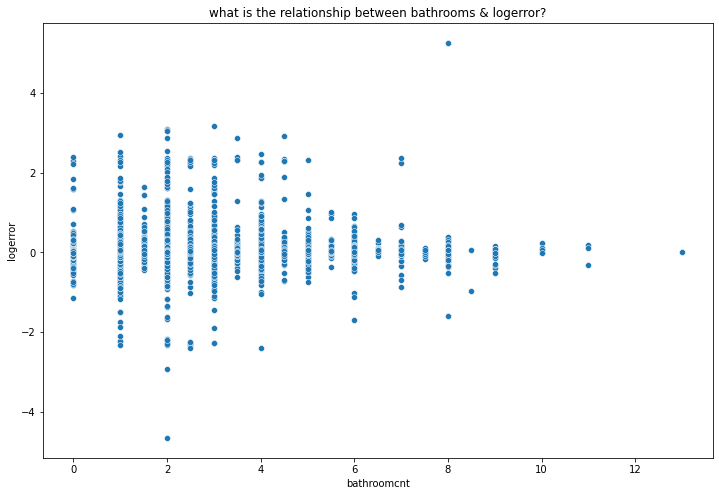

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'bathroomcnt', y = 'logerror');
plt.title('what is the relationship between bathrooms & logerror?')
plt.show()

## Takeway
 - Three & four bedroom houses seems to have the highest logerror
 - Two & three bathroom houses seems to have the highest log error

## Q3 What is the relationship between calculated finished square feet & logerror?

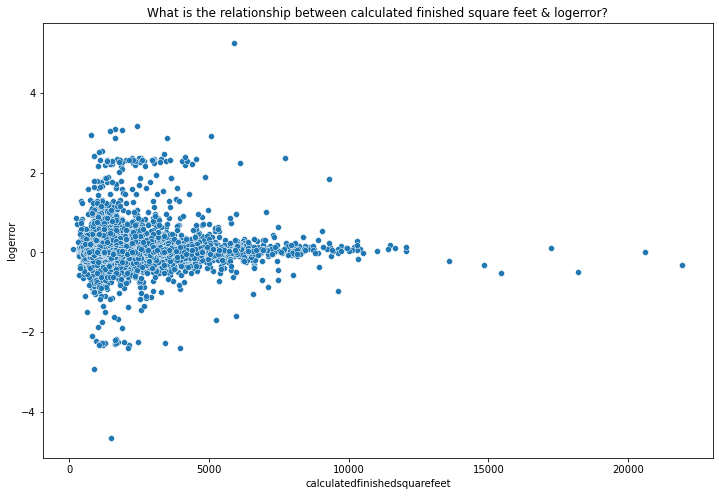

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'calculatedfinishedsquarefeet', y = 'logerror');
plt.title('What is the relationship between calculated finished square feet & logerror?')
plt.show()

## Takeaway
 - There is an even positive & negative log error correlation close to zero.
  

## Q4. What is the relationship between different types of houses & logerror?

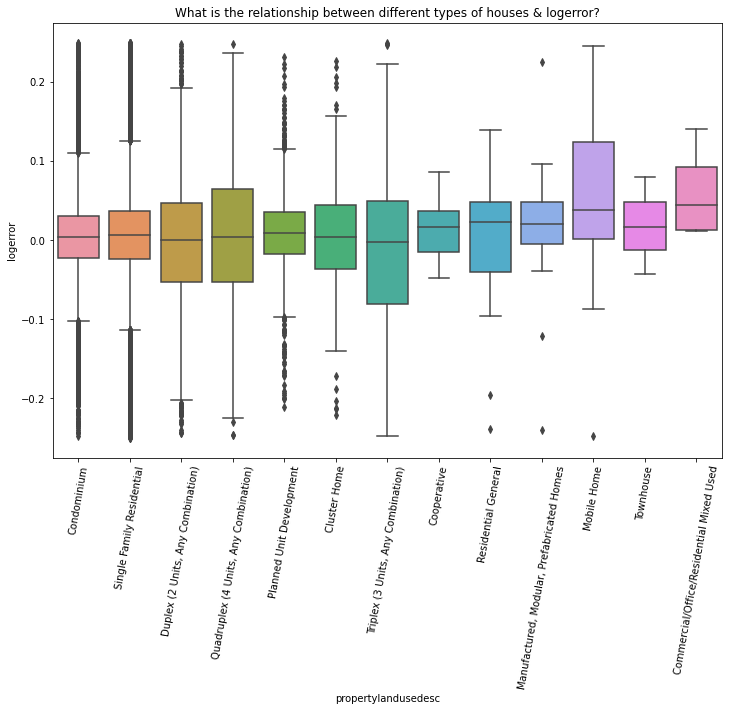

In [28]:
plt.figure(figsize=(12,8))
mask = (train.logerror < 0.25) & (train.logerror > -0.25)
sns.boxplot(data = train[mask], x = 'propertylandusedesc', y = 'logerror')
plt.xticks(rotation = 80);
plt.title('What is the relationship between different types of houses & logerror?')
plt.show()

## Takeaway
### Single family residential & condominium have the highest logerror compared to the rest of the houses

## Q5 What is the relationship between the year the house was built & logerror?

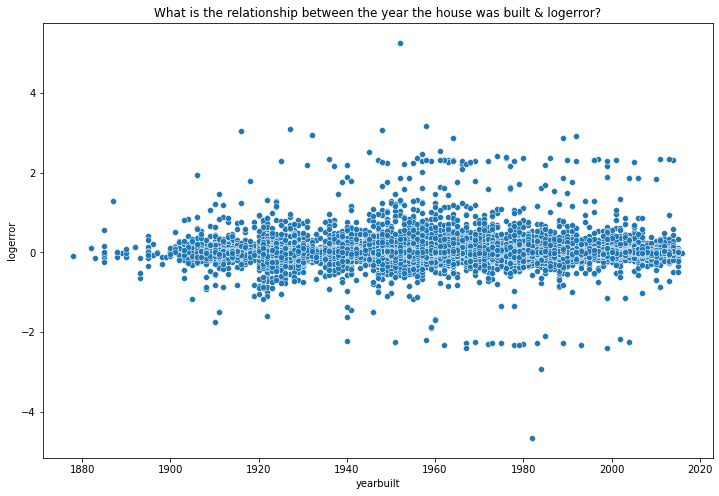

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'yearbuilt', y = 'logerror');
plt.title('What is the relationship between the year the house was built & logerror?')
plt.show()

### Takeaway
 - Houses built between 1960 to 1980 have the highest log error